In [30]:
!pip install pandas_datareader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [31]:
import yfinance as yf
import datetime as dt

stock = "POWERGRID.NS"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2024, 11, 1)

df = yf.download(stock, start, end)

C:\Users\Hp\AppData\Local\Temp\ipykernel_17492\2487901451.py:8: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


In [32]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,32.545422,35.424689,26.900117,29.051480,855215656
2007-10-08,30.879328,33.645365,30.685219,33.645365,126671715
2007-10-09,32.982170,33.273331,29.229417,30.895509,116725709
2007-10-10,33.289513,33.968891,32.998352,33.839485,67931378
2007-10-11,37.009914,38.821589,32.998352,38.821589,106320954


In [33]:
df.shape

(4208, 5)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4208 entries, 2007-10-05 to 2024-10-31
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4208 non-null   float64
 1   (High, POWERGRID.NS)    4208 non-null   float64
 2   (Low, POWERGRID.NS)     4208 non-null   float64
 3   (Open, POWERGRID.NS)    4208 non-null   float64
 4   (Volume, POWERGRID.NS)  4208 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 197.2 KB


In [35]:
df.isnull().sum()

Price   Ticker      
Close   POWERGRID.NS    0
High    POWERGRID.NS    0
Low     POWERGRID.NS    0
Open    POWERGRID.NS    0
Volume  POWERGRID.NS    0
dtype: int64

In [36]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4208.000000,4208.000000,4208.000000,4208.000000,4.208000e+03
mean,79.483549,80.517027,78.462750,79.520589,1.188963e+07
std,63.570576,64.313382,62.779670,63.552224,2.061999e+07
min,19.001736,20.312200,17.036039,20.213915,0.000000e+00
25%,36.529128,37.105429,35.989639,36.566529,4.799653e+06
50%,55.504940,56.145825,54.762121,55.611498,8.344398e+06
75%,83.112991,84.105056,82.127443,83.135587,1.362032e+07
max,356.113861,356.893408,348.074624,354.749603,8.552157e+08


In [37]:
df = df.reset_index()

In [38]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [39]:
df.to_csv("powergrid.csv")

In [40]:
data01 = pd.read_csv("powergrid.csv")

In [41]:
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05,32.5454216003418,35.4246891776911,26.90011689528922,29.051480080819935,855215656
2,1,2007-10-08,30.87932777404785,33.6453646841474,30.685219073914716,33.6453646841474,126671715
3,2,2007-10-09,32.98217010498047,33.27333102819074,29.229417128249786,30.895508777439975,116725709
4,3,2007-10-10,33.289512634277344,33.968891159536575,32.998351662859996,33.839484576934595,67931378


In [47]:
pip install nbformat

Note: you may need to restart the kernel to use updated packages.


In [52]:
import plotly.graph_objects as go
import plotly.io as pio

# Force Plotly to open in your default browser
pio.renderers.default = 'browser'

fig = go.Figure(data=[go.Candlestick(
    x=data01['Date'],
    open=data01['Open'],
    high=data01['High'],
    low=data01['Low'],
    close=data01['Close']
)])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()


In [55]:
df = df.drop(columns=[col for col in ['Date', 'Adj Close'] if col in df.columns])


C:\Users\Hp\AppData\Local\Temp\ipykernel_17492\3747943799.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [56]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,32.545422,35.424689,26.900117,29.051480,855215656
1,30.879328,33.645365,30.685219,33.645365,126671715
2,32.982170,33.273331,29.229417,30.895509,116725709
3,33.289513,33.968891,32.998352,33.839485,67931378
4,37.009914,38.821589,32.998352,38.821589,106320954


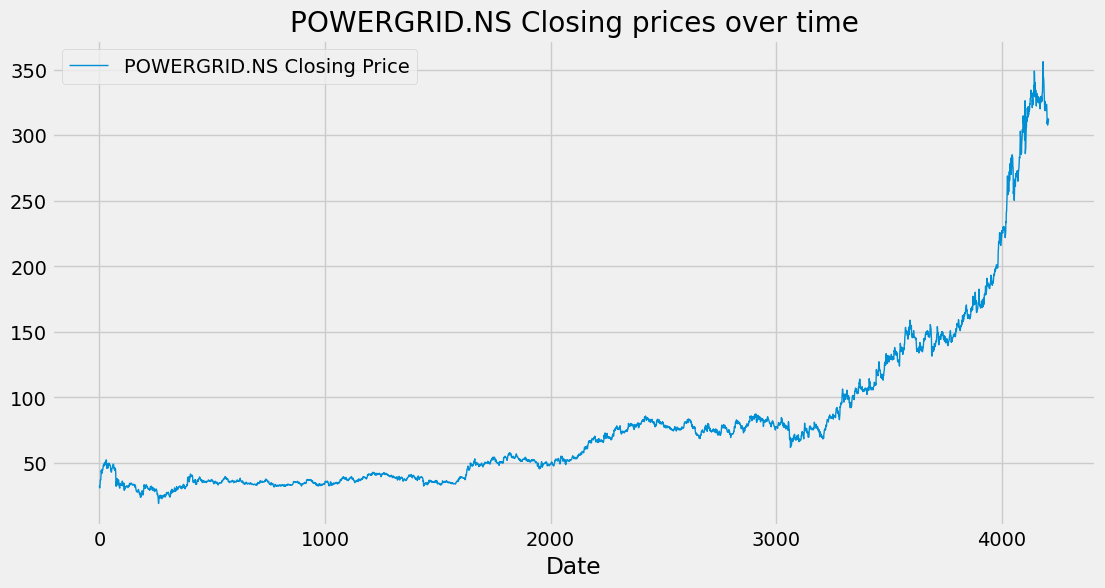

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.xlabel('Date')
plt.legend()
plt.show()

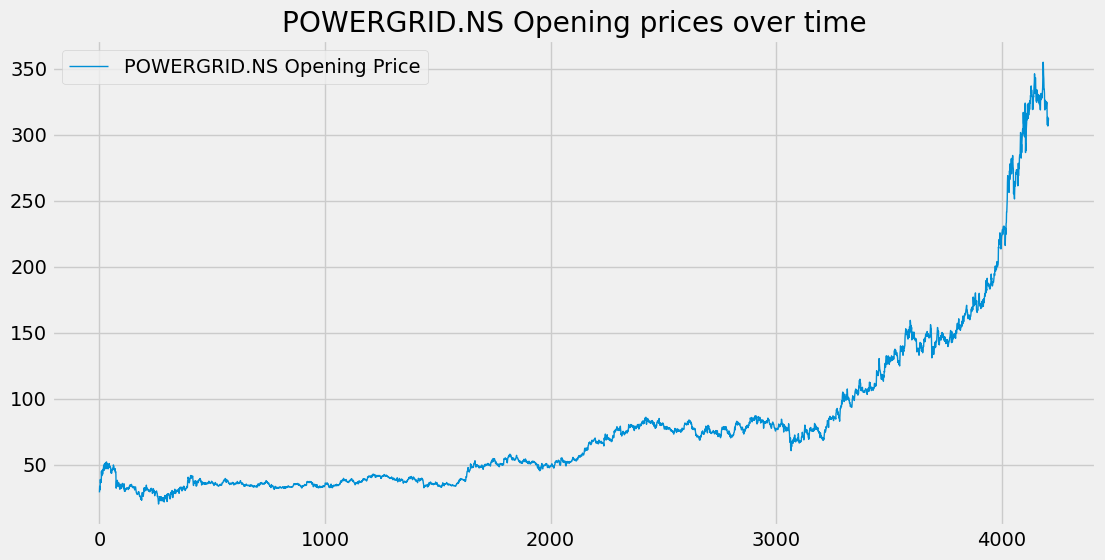

In [58]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

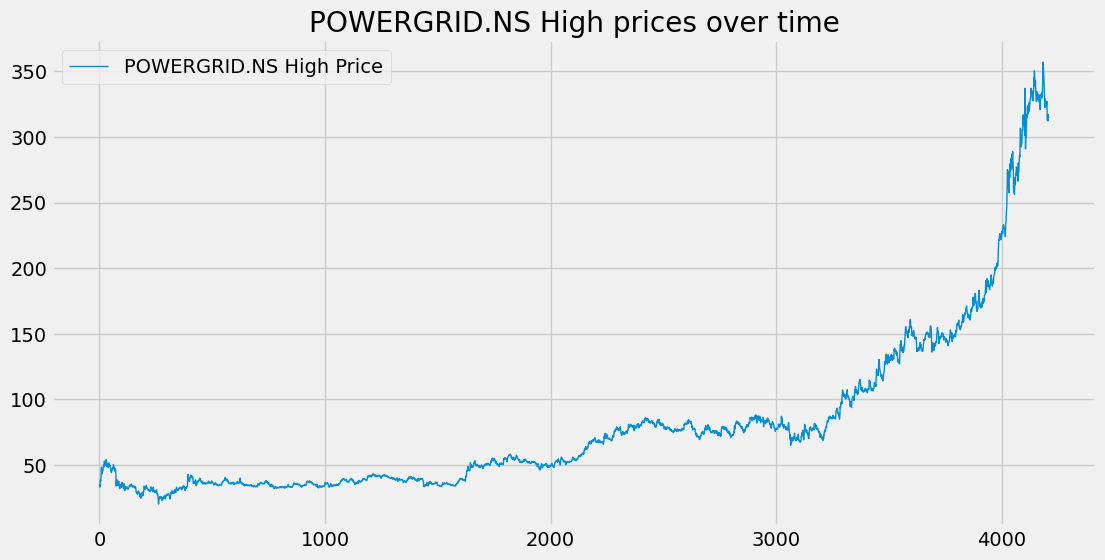

In [59]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

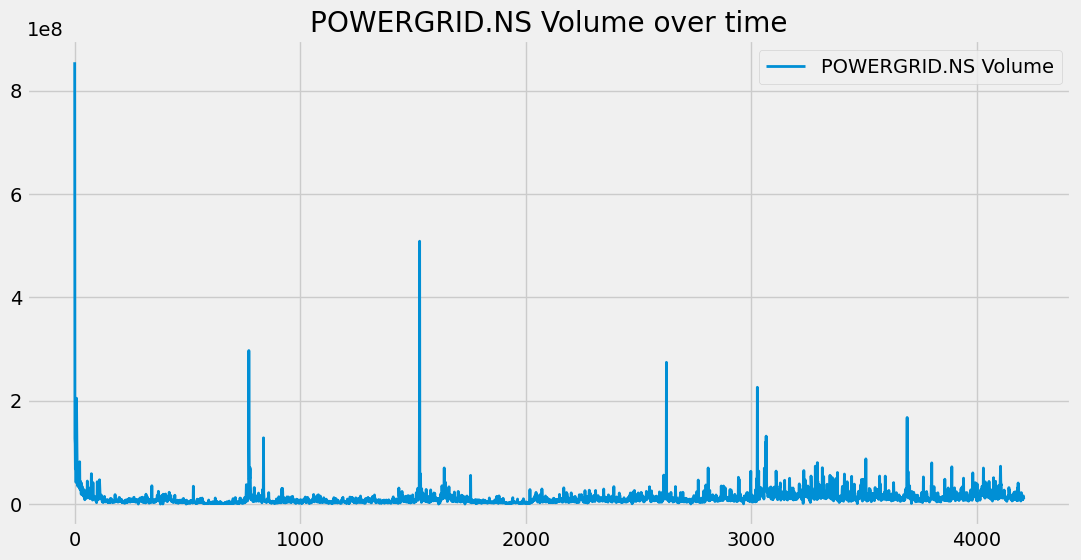

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 2)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

In [61]:
# Moving Average
# [10, 20, 30, 40, 50, 60, 70, 80, 90]
# moving average for last 5 days -> null null null null 30.0 40.0 50.0

temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]
print(sum(temp_data[2:7])/5)

50.0


In [62]:
import pandas as pd
df01 = pd.DataFrame(temp_data)

In [63]:
df01.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [64]:
ma100 = df.Close.rolling(100).mean()

In [65]:
ma100

Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4203,324.993563
4204,325.235133
4205,325.471086
4206,325.670630


In [66]:
ma200 = df.Close.rolling(200).mean()

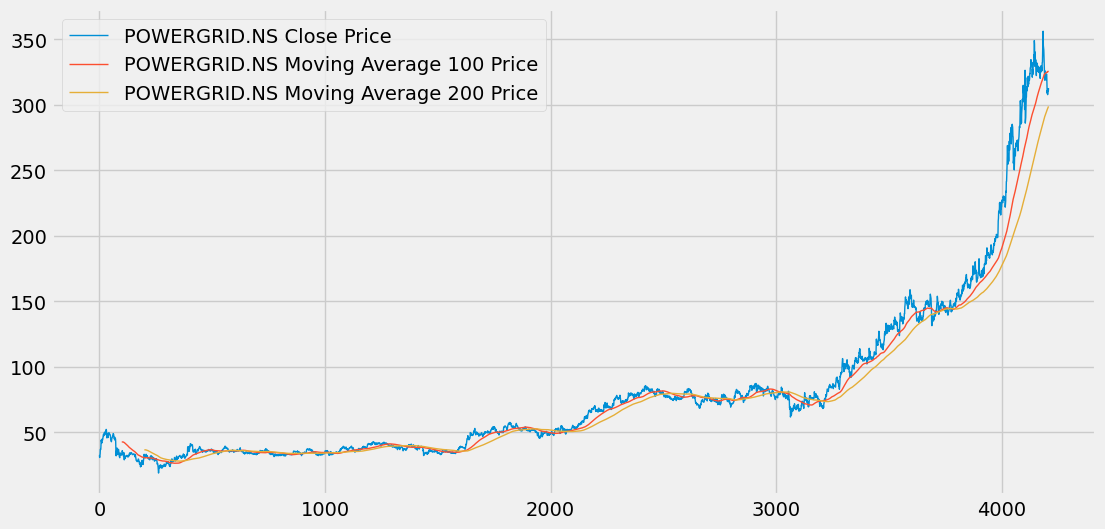

In [67]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [68]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()

In [69]:
ema200 = df['Close'].ewm(span=200, adjust = False).mean()

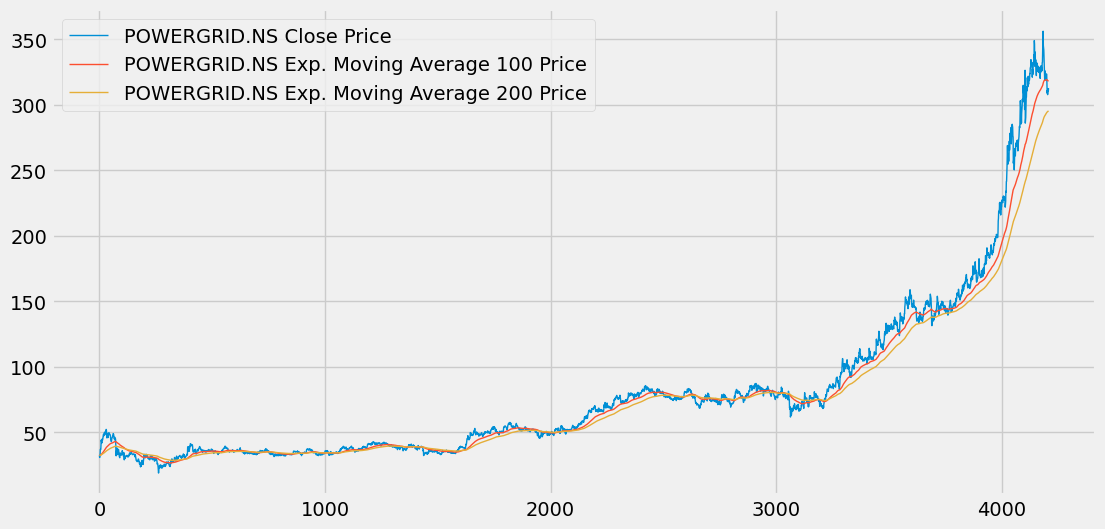

In [70]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [71]:
# Training & Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [72]:
data_training.shape

(2945, 1)

In [73]:
data_testing.shape

(1263, 1)

In [74]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [75]:
data_training_array = scaler.fit_transform(data_training)

In [76]:
data_training_array

array([[0.19808597],
       [0.17371817],
       [0.20447372],
       ...,
       [0.90774408],
       [0.86000355],
       [0.87299642]])

In [77]:
data_training_array.shape[0]

2945

In [78]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)

In [79]:
x_train.shape

(2845, 100, 1)

In [80]:
# Model Building
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

LSTM Input -> 3D Array (batch_size, time_steps, seq_len)
LSTM 2D OR 3D
2D -> (batch_sizem units)
3D -> (batch_size, time_steps, units)

In [81]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [82]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [83]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
89/89 [==============================] - 22s 180ms/step - loss: 0.0397
Epoch 2/50
89/89 [==============================] - 20s 224ms/step - loss: 0.0081
Epoch 3/50
89/89 [==============================] - 20s 224ms/step - loss: 0.0077
Epoch 4/50
89/89 [==============================] - 20s 225ms/step - loss: 0.0075
Epoch 5/50
89/89 [==============================] - 20s 219ms/step - loss: 0.0065
Epoch 6/50
89/89 [==============================] - 18s 201ms/step - loss: 0.0061
Epoch 7/50
89/89 [==============================] - 19s 210ms/step - loss: 0.0055
Epoch 8/50
89/89 [==============================] - 16s 176ms/step - loss: 0.0058
Epoch 9/50
89/89 [==============================] - 17s 195ms/step - loss: 0.0049
Epoch 10/50
89/89 [==============================] - 16s 182ms/step - loss: 0.0047
Epoch 11/50
89/89 [==============================] - 18s 200ms/step - loss: 0.0048
Epoch 12/50
89/89 [==============================] - 14s 161ms/step - loss: 0.0042
Epoch 13/50
8

In [85]:
past_100_days = data_training.tail(100)

In [87]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [88]:
final_df.head()

Ticker,POWERGRID.NS
0,76.105637
1,77.657150
2,77.922531
3,77.759224
4,78.208344


In [89]:
input_data = scaler.fit_transform(final_df)

In [90]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [91]:
x_test.shape

(1263, 100, 1)

In [92]:
y_predicted = model.predict(x_test)

40/40 [==============================] - 3s 66ms/step


In [93]:
y_predicted.shape

(1263, 1)

In [94]:
scaler.scale_

array([0.00339719])

In [95]:
scaler_factor = 1 / 0.0035166
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

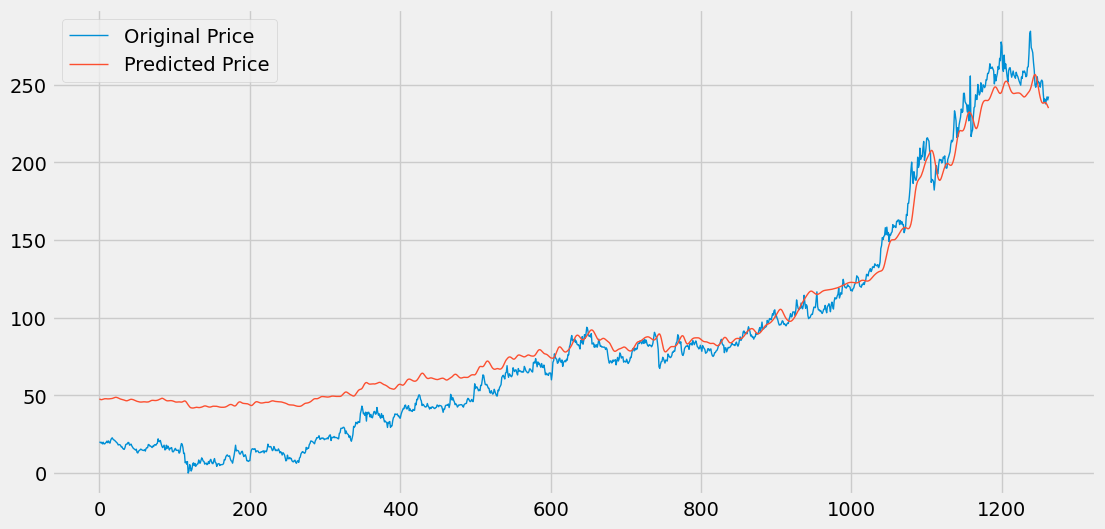

In [96]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [97]:
model.save('stock_dl_model.h5')